<a href="https://colab.research.google.com/github/Jade-RM/rabbit-behaviour-tracker-project/blob/main/RabbitBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
from google.colab import files
data_to_load = files.upload()

Saving rabbit1_behavior_log FINAL_ONE_MONTH_RESULTS.csv to rabbit1_behavior_log FINAL_ONE_MONTH_RESULTS.csv


In [4]:
from google.colab import files
data_to_load = files.upload()

Saving rabbit2_behavior_log FINAL_ONE_MONTH_RESULTS.csv to rabbit2_behavior_log FINAL_ONE_MONTH_RESULTS.csv


Load the data from the CSV files "rabbit1_behavior_logFINAL_ONE_MONTH_RESULTS.csv" and "rabbit2_behavior_logFINAL_ONE_MONTH_RESULTS.csv" into pandas DataFrames and name them df_rabbit1 and df_rabbit2.

In [5]:
df_rabbit1 = pd.read_csv('rabbit1_behavior_log FINAL_ONE_MONTH_RESULTS.csv')
df_rabbit2 = pd.read_csv('rabbit2_behavior_log FINAL_ONE_MONTH_RESULTS.csv')
display(df_rabbit1.head())
display(df_rabbit2.head())

,Behavior,Timestamp,Together,Note
0,Eating,2025-06-16T16:21:53.115Z,Yes,NaN
1,Resting,2025-06-16T17:08:52.533Z,No,NaN
2,Interacting,2025-06-16T17:47:38.666Z,Yes,NaN
3,Cuddling,2025-06-16T18:32:29.417Z,Yes,NaN
4,Cuddling,2025-06-16T18:45:27.827Z,Yes,Waiting for treats


,Behavior,Timestamp,Together,Note
0,Eating,2025-06-16T16:21:53.115Z,Yes,NaN
1,Exploring,2025-06-16T17:08:57.114Z,No,NaN
2,Interacting,2025-06-16T17:47:38.666Z,Yes,NaN
3,Cuddling,2025-06-16T18:32:29.417Z,Yes,NaN
4,Cuddling,2025-06-16T18:45:27.827Z,Yes,Waiting for treats


Now that the CSV files are loaded into the DataFrames, an examination is to be performed on them to identify any missing values, and check for any inconsistencies or errors. This is done by printing a summary of each DataFrame in which the index dtype and column dtypes, non-null values and memory usage are shown. The number of missing and unique values are then printed out. After these summaries have been done, the value counts for the top 5 most frequent values in each object column are printed out. This enavles the distribution of categorical data to be better understood.

The top 5 most frequent behaviours found are, in order of frequency: 'Eating' 'Resting', 'Cuddling', 'Running' and 'Exploring'.


In [6]:
print("--- Summary of df_rabbit1 ---")
df_rabbit1.info()
print("\n--- Missing values in df_rabbit1 ---")
print(df_rabbit1.isnull().sum())
print("\n--- Unique values in df_rabbit1 ---")
print(df_rabbit1.nunique())
print("\n--- Value counts for object columns in df_rabbit1 ---")
for col in df_rabbit1.select_dtypes(include='object').columns:
    print(f"\nValue counts for column: {col}")
    print(df_rabbit1[col].value_counts().head(5))

print("\n\n--- Summary of df_rabbit2 ---")
df_rabbit2.info()
print("\n--- Missing values in df_rabbit2 ---")
print(df_rabbit2.isnull().sum())
print("\n--- Unique values in df_rabbit2 ---")
print(df_rabbit2.nunique())
print("\n--- Value counts for object columns in df_rabbit2 ---")
for col in df_rabbit2.select_dtypes(include='object').columns:
    print(f"\nValue counts for column: {col}")
    print(df_rabbit2[col].value_counts().head(5))

--- Summary of df_rabbit1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Behavior   382 non-null    object
 1   Timestamp  382 non-null    object
 2   Together   382 non-null    object
 3   Note       18 non-null     object
dtypes: object(4)
memory usage: 12.1+ KB

--- Missing values in df_rabbit1 ---
Behavior       0
Timestamp      0
Together       0
Note         364
dtype: int64

--- Unique values in df_rabbit1 ---
Behavior      14
Timestamp    382
Together       2
Note          16
dtype: int64

--- Value counts for object columns in df_rabbit1 ---

Value counts for column: Behavior
Behavior
Resting     113
Eating       85
Cuddling     58
Running      26
Playing      17
Name: count, dtype: int64

Value counts for column: Timestamp
Timestamp
2025-07-15T16:53:52.529Z    1
2025-06-16T16:21:53.115Z    1
2025-06-16T17:08:52.533Z    1
2025-06-16T17

The data is cleaned by addressing any issues which were found during the inspection in the previous step, such as dealing with missing values, correcting data types, or removing duplicates. The 'Timestamp' column is converted to datetime objects and the empty Note columns are filled in with the string 'No note provided'.


In [7]:
df_rabbit1['Timestamp'] = pd.to_datetime(df_rabbit1['Timestamp'])
df_rabbit2['Timestamp'] = pd.to_datetime(df_rabbit2['Timestamp'])
df_rabbit1['Note'] = df_rabbit1['Note'].fillna('No note provided')
df_rabbit2['Note'] = df_rabbit2['Note'].fillna('No note provided')
display(df_rabbit1.head())
display(df_rabbit2.head())

,Behavior,Timestamp,Together,Note
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided
1,Resting,2025-06-16 17:08:52.533000+00:00,No,No note provided
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats


,Behavior,Timestamp,Together,Note
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided
1,Exploring,2025-06-16 17:08:57.114000+00:00,No,No note provided
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats


The data has been cleaned and is now in a suitable format for further analysis.


The data is to be analysed in order to answer the research question: "What is the distribution of daily shared and solo activities of bonded rabbits, and which behaviours occur most frequently?"

A new column is created in each DataFrame containing only the date, without the other parts of the 'Timestamp', so we can clearly see the date on which activities took place.


In [8]:
df_rabbit1['Date'] = df_rabbit1['Timestamp'].dt.date
df_rabbit2['Date'] = df_rabbit2['Timestamp'].dt.date
display(df_rabbit1.head())
display(df_rabbit2.head())

,Behavior,Timestamp,Together,Note,Date
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16
1,Resting,2025-06-16 17:08:52.533000+00:00,No,No note provided,2025-06-16
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16


,Behavior,Timestamp,Together,Note,Date
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16
1,Exploring,2025-06-16 17:08:57.114000+00:00,No,No note provided,2025-06-16
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16


Next, the activities are categorised by determining whether an activity is 'Shared' or 'Solo' based on the 'Together' column.


In [9]:
df_rabbit1['Activity_Type'] = df_rabbit1['Together'].apply(lambda x: 'Shared' if x == 'Yes' else 'Solo')
df_rabbit2['Activity_Type'] = df_rabbit2['Together'].apply(lambda x: 'Shared' if x == 'Yes' else 'Solo')
display(df_rabbit1.head())
display(df_rabbit2.head())

,Behavior,Timestamp,Together,Note,Date,Activity_Type
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16,Shared
1,Resting,2025-06-16 17:08:52.533000+00:00,No,No note provided,2025-06-16,Solo
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16,Shared
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16,Shared
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16,Shared


,Behavior,Timestamp,Together,Note,Date,Activity_Type
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16,Shared
1,Exploring,2025-06-16 17:08:57.114000+00:00,No,No note provided,2025-06-16,Solo
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16,Shared
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16,Shared
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16,Shared


The data is grouped by date and the 'Together' status and the number of activities is counted for each day and category ('Yes' for shared, 'No' for solo).


In [10]:
df_rabbit1_activity_counts = df_rabbit1.groupby(['Date', 'Together']).size().reset_index(name='Activity_Count')
df_rabbit2_activity_counts = df_rabbit2.groupby(['Date', 'Together']).size().reset_index(name='Activity_Count')
display(df_rabbit1_activity_counts.head())
display(df_rabbit2_activity_counts.head())

,Date,Together,Activity_Count
0,2025-06-16,No,4
1,2025-06-16,Yes,5
2,2025-06-17,No,5
3,2025-06-17,Yes,9
4,2025-06-18,No,8


,Date,Together,Activity_Count
0,2025-06-16,No,4
1,2025-06-16,Yes,5
2,2025-06-17,No,5
3,2025-06-17,Yes,9
4,2025-06-18,No,8


Next, the daily distribution is calculated. This is done by calculating the total daily count for each rabbit, then merging it with the activity counts dataframe and finally calculating the percentage of shared and solo activities for each day.


In [11]:
df_rabbit1_daily_totals = df_rabbit1_activity_counts.groupby('Date')['Activity_Count'].sum().reset_index(name='Total_Daily_Count')
df_rabbit1_activity_counts = pd.merge(df_rabbit1_activity_counts, df_rabbit1_daily_totals, on='Date')
df_rabbit1_activity_counts['Percentage'] = (df_rabbit1_activity_counts['Activity_Count'] / df_rabbit1_activity_counts['Total_Daily_Count']) * 100

df_rabbit2_daily_totals = df_rabbit2_activity_counts.groupby('Date')['Activity_Count'].sum().reset_index(name='Total_Daily_Count')
df_rabbit2_activity_counts = pd.merge(df_rabbit2_activity_counts, df_rabbit2_daily_totals, on='Date')
df_rabbit2_activity_counts['Percentage'] = (df_rabbit2_activity_counts['Activity_Count'] / df_rabbit2_activity_counts['Total_Daily_Count']) * 100

display(df_rabbit1_activity_counts.head())
display(df_rabbit2_activity_counts.head())

,Date,Together,Activity_Count,Total_Daily_Count,Percentage
0,2025-06-16,No,4,9,44.444444
1,2025-06-16,Yes,5,9,55.555556
2,2025-06-17,No,5,14,35.714286
3,2025-06-17,Yes,9,14,64.285714
4,2025-06-18,No,8,15,53.333333


,Date,Together,Activity_Count,Total_Daily_Count,Percentage
0,2025-06-16,No,4,9,44.444444
1,2025-06-16,Yes,5,9,55.555556
2,2025-06-17,No,5,14,35.714286
3,2025-06-17,Yes,9,14,64.285714
4,2025-06-18,No,8,15,53.333333


After finding the daily distribution of behaviours for the rabbits, the most frequent behaviours are calculated, firstly the overall behaviours, then separately for 'Shared' and 'Solo' activities. The top 10 for each category is then displayed.


In [12]:
# Overall behavior frequency
overall_behavior_rabbit1 = df_rabbit1['Behavior'].value_counts()
overall_behavior_rabbit2 = df_rabbit2['Behavior'].value_counts()

# Shared activity behavior frequency
shared_behavior_rabbit1 = df_rabbit1[df_rabbit1['Together'] == 'Yes']['Behavior'].value_counts()
shared_behavior_rabbit2 = df_rabbit2[df_rabbit2['Together'] == 'Yes']['Behavior'].value_counts()

# Solo activity behavior frequency
solo_behavior_rabbit1 = df_rabbit1[df_rabbit1['Together'] == 'No']['Behavior'].value_counts()
solo_behavior_rabbit2 = df_rabbit2[df_rabbit2['Together'] == 'No']['Behavior'].value_counts()

print("--- Top 10 Overall Behaviors (Rabbit 1) ---")
print(overall_behavior_rabbit1.head(10))
print("\n--- Top 10 Overall Behaviors (Rabbit 2) ---")
print(overall_behavior_rabbit2.head(10))

print("\n--- Top 10 Shared Activity Behaviors (Rabbit 1) ---")
print(shared_behavior_rabbit1.head(10))
print("\n--- Top 10 Shared Activity Behaviors (Rabbit 2) ---")
print(shared_behavior_rabbit2.head(10))

print("\n--- Top 10 Solo Activity Behaviors (Rabbit 1) ---")
print(solo_behavior_rabbit1.head(10))
print("\n--- Top 10 Solo Activity Behaviors (Rabbit 2) ---")
print(solo_behavior_rabbit2.head(10))

--- Top 10 Overall Behaviors (Rabbit 1) ---
Behavior
Resting        113
Eating          85
Cuddling        58
Running         26
Playing         17
Grooming        17
Hiding          16
Interacting     15
Alert           15
Exploring       13
Name: count, dtype: int64

--- Top 10 Overall Behaviors (Rabbit 2) ---
Behavior
Eating         96
Resting        90
Cuddling       58
Running        29
Exploring      27
Hiding         25
Interacting    17
Grooming       16
Playing        15
Alert           5
Name: count, dtype: int64

--- Top 10 Shared Activity Behaviors (Rabbit 1) ---
Behavior
Cuddling       58
Eating         51
Resting        30
Running        26
Grooming       16
Playing        15
Interacting    13
Hiding          9
Exploring       4
Alert           3
Name: count, dtype: int64

--- Top 10 Shared Activity Behaviors (Rabbit 2) ---
Behavior
Cuddling       58
Eating         51
Resting        30
Running        26
Grooming       16
Playing        15
Interacting    13
Hiding         

Visualisations (e.g., stacked bar chart) are created to show and get an overview of the daily distribution of shared and solo activities.


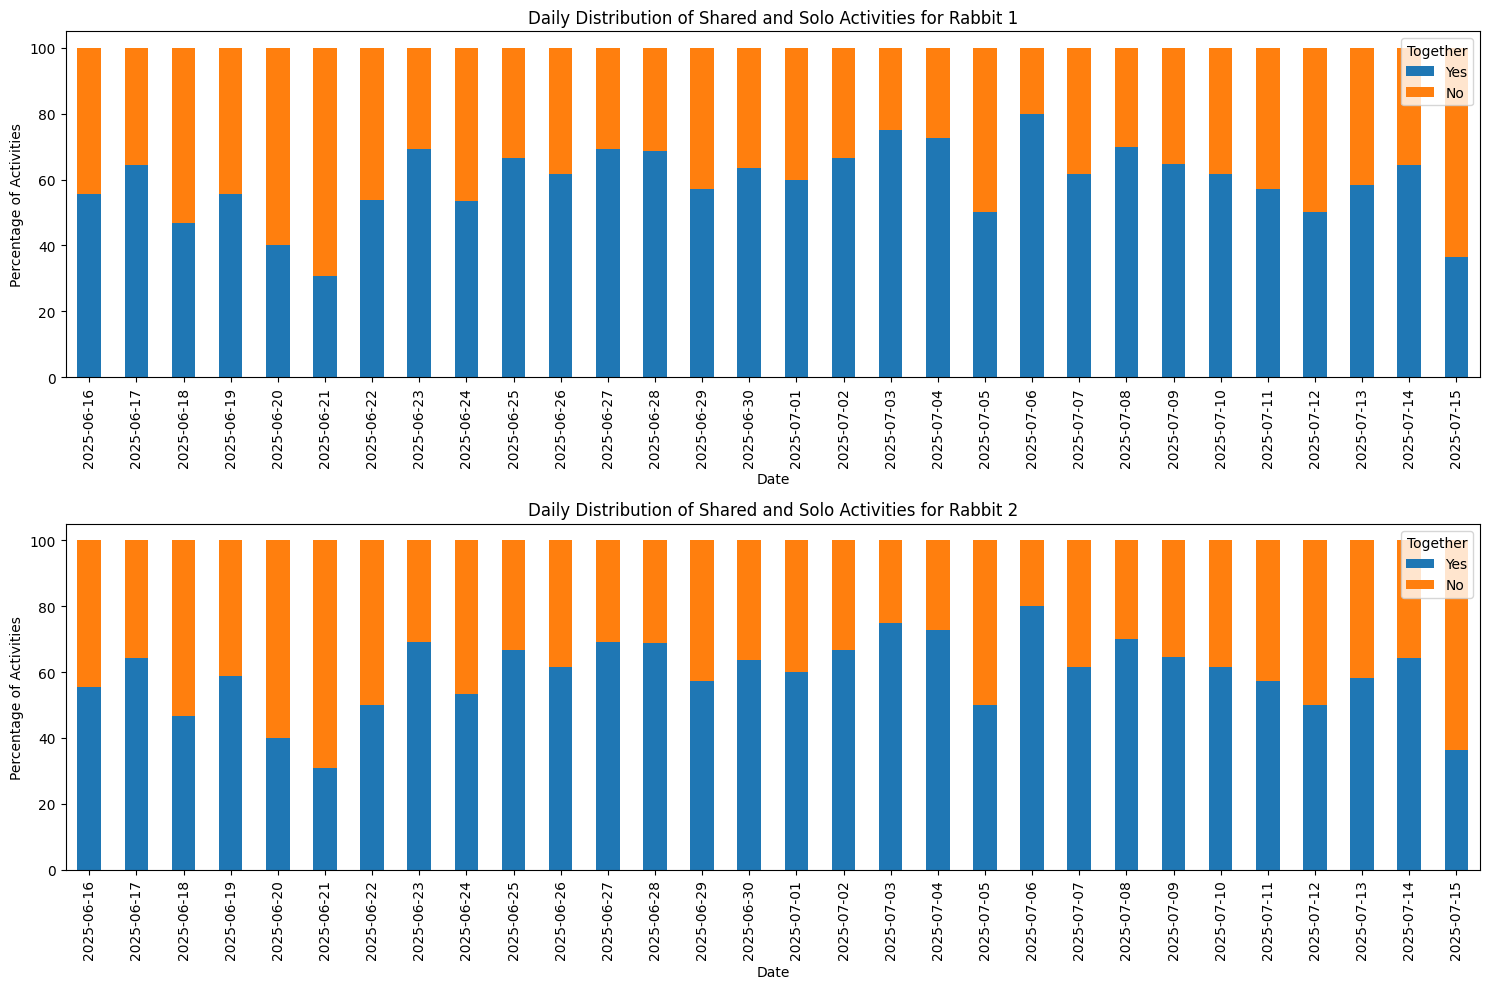

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot for Rabbit 1
df_rabbit1_activity_counts_pivot = df_rabbit1_activity_counts.pivot(index='Date', columns='Together', values='Percentage').fillna(0)
df_rabbit1_activity_counts_pivot[['Yes', 'No']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Daily Distribution of Shared and Solo Activities for Rabbit 1')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage of Activities')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Together')

# Plot for Rabbit 2
df_rabbit2_activity_counts_pivot = df_rabbit2_activity_counts.pivot(index='Date', columns='Together', values='Percentage').fillna(0)
df_rabbit2_activity_counts_pivot[['Yes', 'No']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Daily Distribution of Shared and Solo Activities for Rabbit 2')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percentage of Activities')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Together')

plt.tight_layout()
plt.show()

Next, the most frequent behaviours are presented in a clear format (easily readable Top 5 charts for each category and rabbit).


In [14]:
print("--- Top 5 Overall Behaviors (Rabbit 1) ---")
print(overall_behavior_rabbit1.head(5))
print("\n--- Top 5 Overall Behaviors (Rabbit 2) ---")
print(overall_behavior_rabbit2.head(5))

print("\n--- Top 5 Shared Activity Behaviors (Rabbit 1) ---")
print(shared_behavior_rabbit1.head(5))
print("\n--- Top 5 Shared Activity Behaviors (Rabbit 2) ---")
print(shared_behavior_rabbit2.head(5))

print("\n--- Top 5 Solo Activity Behaviors (Rabbit 1) ---")
print(solo_behavior_rabbit1.head(5))
print("\n--- Top 5 Solo Activity Behaviors (Rabbit 2) ---")
print(solo_behavior_rabbit2.head(5))

--- Top 5 Overall Behaviors (Rabbit 1) ---
Behavior
Resting     113
Eating       85
Cuddling     58
Running      26
Playing      17
Name: count, dtype: int64

--- Top 5 Overall Behaviors (Rabbit 2) ---
Behavior
Eating       96
Resting      90
Cuddling     58
Running      29
Exploring    27
Name: count, dtype: int64

--- Top 5 Shared Activity Behaviors (Rabbit 1) ---
Behavior
Cuddling    58
Eating      51
Resting     30
Running     26
Grooming    16
Name: count, dtype: int64

--- Top 5 Shared Activity Behaviors (Rabbit 2) ---
Behavior
Cuddling    58
Eating      51
Resting     30
Running     26
Grooming    16
Name: count, dtype: int64

--- Top 5 Solo Activity Behaviors (Rabbit 1) ---
Behavior
Resting      83
Eating       34
Alert        12
Exploring     9
Hiding        7
Name: count, dtype: int64

--- Top 5 Solo Activity Behaviors (Rabbit 2) ---
Behavior
Resting        60
Eating         45
Exploring      23
Hiding         16
Interacting     4
Name: count, dtype: int64


## Summary:

### Key Findings of the Data Analysis

*   Rabbit 1's most frequent overall behaviours were Resting, Eating, and Cuddling. Rabbit 2's most frequent overall behaviors were Eating, Resting, and Cuddling.
*   Both rabbits exhibited the same top 5 most frequent shared behaviors: Cuddling, Eating, Resting, Running, and Grooming, with Cuddling being the most frequent.
*   Rabbit 1's most frequent solo behaviors were Resting and Eating, followed by Alert and Exploring. Rabbit 2's most frequent solo behaviors were Resting and Eating, followed by Exploring and Hiding.
*   The initial data analysis shows that both rabbits spend most of their time involved in the activities Resting, Eating and Cuddling. Resting and Eating are the activities that both rabbits do most frequently solo, but they also share these activities frequently. The rabbits spend a lot of their shared time Cuddling, and Running and Grooming are also frequent shared activities. The rabbits invest time in Exploring as a solo activity. When solo, Rabbit 1 also exhibits being Alert as a frequent solo activity, while Rabbit 2 hides more frequently (this appears to be the only significant difference in solo behaviour based on most frequent behaviours).

### Insights or Next Steps

*   Analyse the correlation between specific behaviours and whether they are performed solo or shared to understand the context of different activities.
*   Investigate whether there are any patterns or trends in the daily distribution of shared vs. solo activities over time, which would potentially indicate changes in bonding or daily routines.


# Task for Further Analysis
Analyse the distribution of daily shared and solo activities of the bonded rabbits, identify the most frequent behaviours, analyse the correlation between specific behaviours and whether they are solo or shared behaviours, and investigate whether there are any patterns or trends in the daily distribution of shared vs. solo activities over time using the data collected in "shared_solo_activities.csv".

Firstly, the relationship between specific behaviours and whether they are performed as 'Shared' or 'Solo' activities was analysed.


In [15]:
cross_tab_rabbit1 = pd.crosstab(df_rabbit1['Behavior'], df_rabbit1['Activity_Type'])
cross_tab_rabbit1_normalized = cross_tab_rabbit1.div(cross_tab_rabbit1.sum(axis=1), axis=0) * 100

cross_tab_rabbit2 = pd.crosstab(df_rabbit2['Behavior'], df_rabbit2['Activity_Type'])
cross_tab_rabbit2_normalized = cross_tab_rabbit2.div(cross_tab_rabbit2.sum(axis=1), axis=0) * 100

print("--- Behavior vs. Activity Type Percentage (Rabbit 1) ---")
display(cross_tab_rabbit1_normalized)

print("\n--- Behavior vs. Activity Type Percentage (Rabbit 2) ---")
display(cross_tab_rabbit2_normalized)

--- Behavior vs. Activity Type Percentage (Rabbit 1) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,20.000000,80.000000
Chewing,50.000000,50.000000
Cuddling,100.000000,0.000000
Eating,60.000000,40.000000
Exploring,30.769231,69.230769
Flopping,0.000000,100.000000
Grooming,94.117647,5.882353
Hiding,56.250000,43.750000
Interacting,86.666667,13.333333



--- Behavior vs. Activity Type Percentage (Rabbit 2) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,60.000000,40.000000
Chewing,25.000000,75.000000
Cuddling,100.000000,0.000000
Eating,53.125000,46.875000
Exploring,14.814815,85.185185
Grooming,100.000000,0.000000
Hiding,36.000000,64.000000
Interacting,76.470588,23.529412
Playing,100.000000,0.000000


The daily distribution of shared vs. solo activities over time was analysed to identify possible patterns or trends.


In [16]:
df_rabbit1_daily_activities = df_rabbit1.groupby(['Date', 'Activity_Type']).size().reset_index(name='Activity_Count')
df_rabbit1_daily_totals = df_rabbit1_daily_activities.groupby('Date')['Activity_Count'].sum().reset_index(name='Total_Activities')
df_rabbit1_daily_distribution = pd.merge(df_rabbit1_daily_activities, df_rabbit1_daily_totals, on='Date')
df_rabbit1_daily_distribution['Percentage'] = (df_rabbit1_daily_distribution['Activity_Count'] / df_rabbit1_daily_distribution['Total_Activities']) * 100

df_rabbit2_daily_activities = df_rabbit2.groupby(['Date', 'Activity_Type']).size().reset_index(name='Activity_Count')
df_rabbit2_daily_totals = df_rabbit2_daily_activities.groupby('Date')['Activity_Count'].sum().reset_index(name='Total_Activities')
df_rabbit2_daily_distribution = pd.merge(df_rabbit2_daily_activities, df_rabbit2_daily_totals, on='Date')
df_rabbit2_daily_distribution['Percentage'] = (df_rabbit2_daily_distribution['Activity_Count'] / df_rabbit2_daily_distribution['Total_Activities']) * 100

display(df_rabbit1_daily_distribution.head())
display(df_rabbit2_daily_distribution.head())

,Date,Activity_Type,Activity_Count,Total_Activities,Percentage
0,2025-06-16,Shared,5,9,55.555556
1,2025-06-16,Solo,4,9,44.444444
2,2025-06-17,Shared,9,14,64.285714
3,2025-06-17,Solo,5,14,35.714286
4,2025-06-18,Shared,7,15,46.666667


,Date,Activity_Type,Activity_Count,Total_Activities,Percentage
0,2025-06-16,Shared,5,9,55.555556
1,2025-06-16,Solo,4,9,44.444444
2,2025-06-17,Shared,9,14,64.285714
3,2025-06-17,Solo,5,14,35.714286
4,2025-06-18,Shared,7,15,46.666667


Visualisations (i.e., bar charts) were created to show the distribution of specific behaviours for 'Shared' and 'Solo' activities.


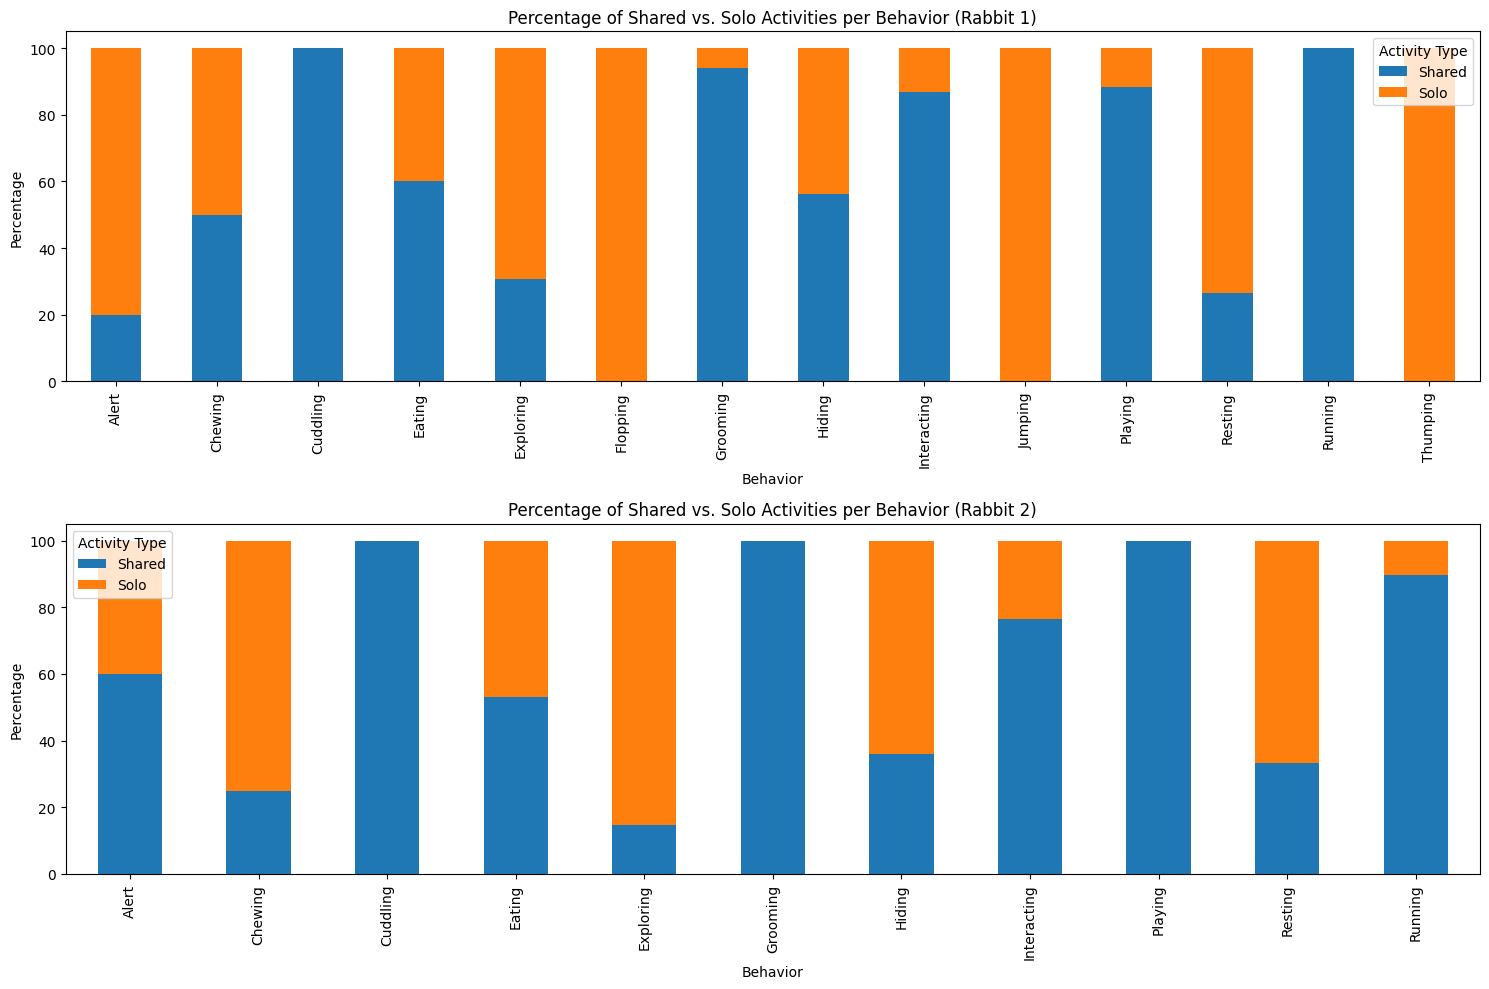

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot for Rabbit 1
cross_tab_rabbit1_normalized[['Shared', 'Solo']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Percentage of Shared vs. Solo Activities per Behavior (Rabbit 1)')
axes[0].set_xlabel('Behavior')
axes[0].set_ylabel('Percentage')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Activity Type')

# Plot for Rabbit 2
cross_tab_rabbit2_normalized[['Shared', 'Solo']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Percentage of Shared vs. Solo Activities per Behavior (Rabbit 2)')
axes[1].set_xlabel('Behavior')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Activity Type')

plt.tight_layout()
plt.show()

Next, line plots were created to show the trends in the percentage of shared and solo activities over time.


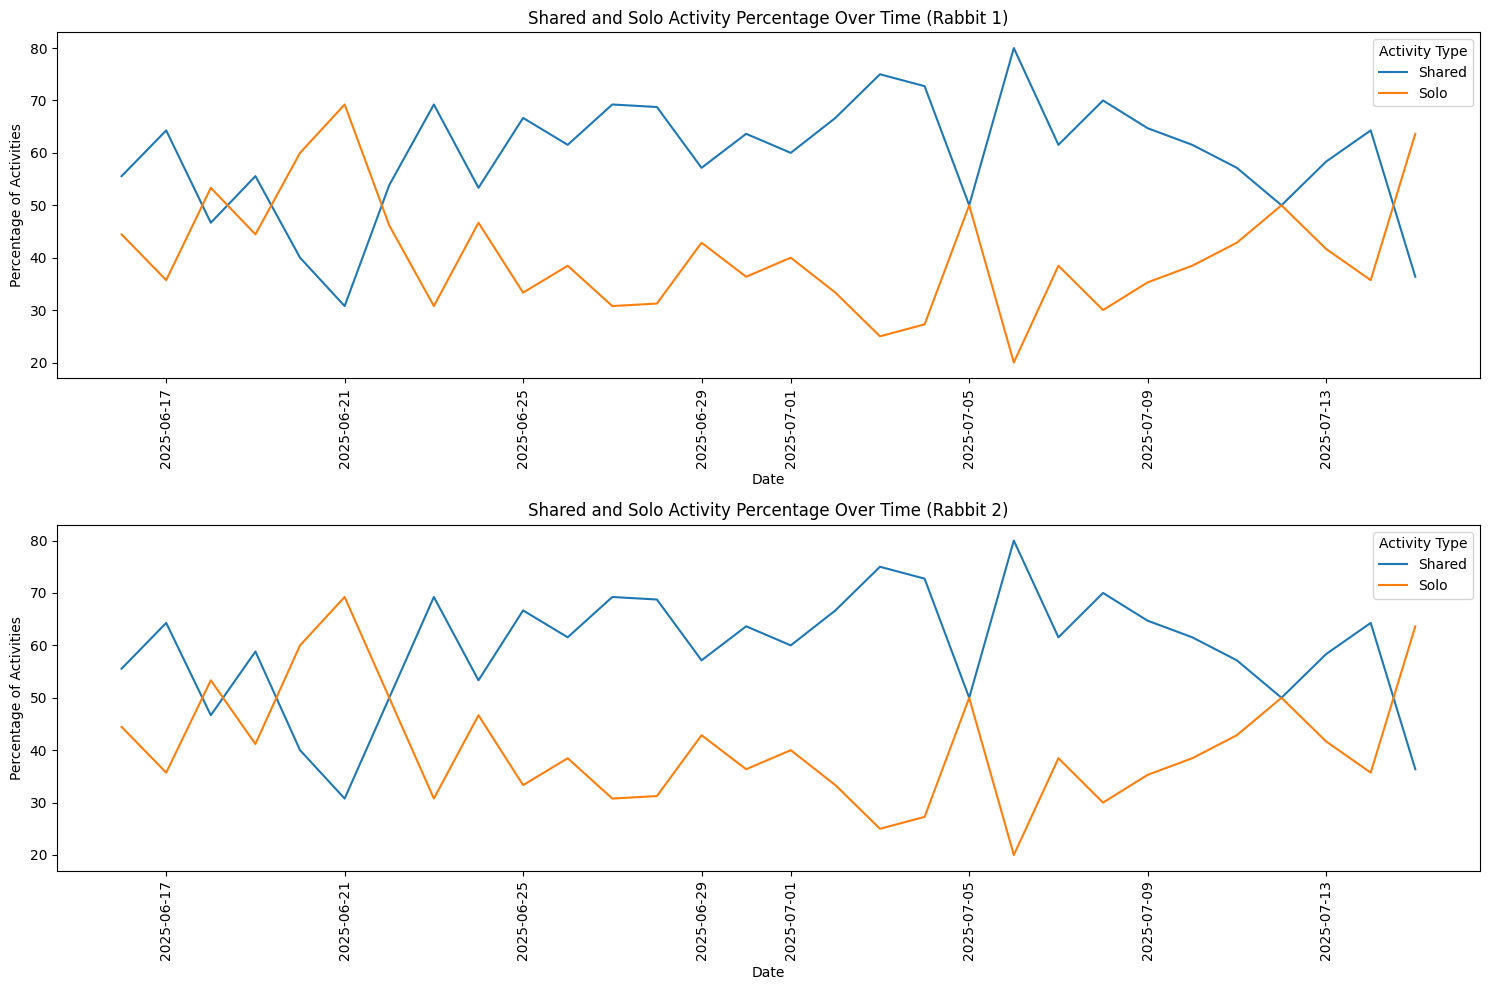

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot for Rabbit 1
df_rabbit1_daily_distribution_pivot = df_rabbit1_daily_distribution.pivot(index='Date', columns='Activity_Type', values='Percentage').fillna(0)
df_rabbit1_daily_distribution_pivot[['Shared', 'Solo']].plot(kind='line', ax=axes[0])
axes[0].set_title('Shared and Solo Activity Percentage Over Time (Rabbit 1)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage of Activities')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Activity Type')

# Plot for Rabbit 2
df_rabbit2_daily_distribution_pivot = df_rabbit2_daily_distribution.pivot(index='Date', columns='Activity_Type', values='Percentage').fillna(0)
df_rabbit2_daily_distribution_pivot[['Shared', 'Solo']].plot(kind='line', ax=axes[1])
axes[1].set_title('Shared and Solo Activity Percentage Over Time (Rabbit 2)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percentage of Activities')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Activity Type')

plt.tight_layout()
plt.show()

## Summary:

### Key Findings of the Data Analysis

*   For Rabbit 1, 'Cuddling', 'Running', 'Grooming', 'Interacting', and 'Playing' were predominantly 'Shared' activities, while 'Alert', 'Exploring', 'Resting', 'Flopping', 'Jumping', and 'Thumping' were mostly 'Solo'.
*   For Rabbit 2, 'Cuddling', 'Grooming', and 'Playing' were exclusively 'Shared', while 'Alert', 'Chewing', 'Exploring', 'Hiding', and 'Resting' were primarily 'Solo'.
*   'Resting', 'Alert', and 'Exploring' were frequent solo activities for both rabbits. The rabbits also displayed preferences for some different solo acitivites. Rabbit 1 spent time solo 'Flopping', 'Jumping', and 'Thumping', while Rabbit 2 spent time solo 'Chewing' and 'Hiding'. These suggest that Rabbit1 is more active and outgoing in solo activities, while Rabbit 2 prefers to hide when solo.
*   Initial inspection of the daily distribution data showed variations in the percentage of shared and solo activities over time for both rabbits.

### Insights or Next Steps

*   Investigate specific dates or periods where significant shifts occurred in the shared vs. solo activity distribution to understand potential external factors or changes in the rabbits' environment or interaction dynamics.
*   Compare the behavioral patterns and activity type distributions between Rabbit 1 and Rabbit 2 to identify similarities and differences in their individual and shared activity preferences.


# Task for Further Analysis
Analyse the provided rabbit activity data to determine the distribution of daily shared and solo activities, identify the most frequent behaviours, and investigate the time of day preferences for solo and shared activities. Also, compare the behavioural patterns between the two rabbits and analyse specific periods with significant shifts in activity distribution.

## Investigate specific dates/periods

Specific dates or periods where significant shifts occurred in the shared vs. solo activity distribution were identified and analysed. The line plots created in the analysis above are used for this purpose.


In [19]:
df_rabbit1 = pd.read_csv('rabbit1_behavior_log FINAL_ONE_MONTH_RESULTS.csv')
df_rabbit2 = pd.read_csv('rabbit2_behavior_log FINAL_ONE_MONTH_RESULTS.csv')

df_rabbit1['Timestamp'] = pd.to_datetime(df_rabbit1['Timestamp'])
df_rabbit2['Timestamp'] = pd.to_datetime(df_rabbit2['Timestamp'])
df_rabbit1['Note'] = df_rabbit1['Note'].fillna('No note provided')
df_rabbit2['Note'] = df_rabbit2['Note'].fillna('No note provided')
df_rabbit1['Date'] = df_rabbit1['Timestamp'].dt.date
df_rabbit2['Date'] = df_rabbit2['Timestamp'].dt.date
df_rabbit1['Activity_Type'] = df_rabbit1['Together'].apply(lambda x: 'Shared' if x == 'Yes' else 'Solo')
df_rabbit2['Activity_Type'] = df_rabbit2['Together'].apply(lambda x: 'Shared' if x == 'Yes' else 'Solo')

dates_of_interest = ['2025-06-21', '2025-07-06', '2025-07-14']

print("--- Activities on dates of interest for Rabbit 1 ---")
for date_str in dates_of_interest:
    date = pd.to_datetime(date_str).date()
    print(f"\nActivities on {date}:")
    display(df_rabbit1[df_rabbit1['Date'] == date])

print("\n--- Activities on dates of interest for Rabbit 2 ---")
for date_str in dates_of_interest:
    date = pd.to_datetime(date_str).date()
    print(f"\nActivities on {date}:")
    display(df_rabbit2[df_rabbit2['Date'] == date])

--- Activities on dates of interest for Rabbit 1 ---

Activities on 2025-06-21:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
71,Eating,2025-06-21 08:48:18.012000+00:00,Yes,drinking,2025-06-21,Shared
72,Resting,2025-06-21 09:47:39.377000+00:00,No,No note provided,2025-06-21,Solo
73,Resting,2025-06-21 11:08:45.151000+00:00,No,No note provided,2025-06-21,Solo
74,Resting,2025-06-21 12:53:38.524000+00:00,No,No note provided,2025-06-21,Solo
75,Resting,2025-06-21 13:51:09.576000+00:00,No,No note provided,2025-06-21,Solo
76,Resting,2025-06-21 14:29:57.678000+00:00,No,No note provided,2025-06-21,Solo
77,Eating,2025-06-21 15:47:51.407000+00:00,No,No note provided,2025-06-21,Solo
78,Resting,2025-06-21 16:57:47.225000+00:00,No,No note provided,2025-06-21,Solo
79,Playing,2025-06-21 18:05:26.526000+00:00,No,No note provided,2025-06-21,Solo
80,Eating,2025-06-21 18:21:54.895000+00:00,Yes,No note provided,2025-06-21,Shared



Activities on 2025-07-06:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
258,Cuddling,2025-07-06 07:29:14.248000+00:00,Yes,No note provided,2025-07-06,Shared
259,Eating,2025-07-06 08:44:02.804000+00:00,Yes,No note provided,2025-07-06,Shared
260,Eating,2025-07-06 09:56:42.296000+00:00,No,No note provided,2025-07-06,Solo
261,Cuddling,2025-07-06 11:09:47.398000+00:00,Yes,No note provided,2025-07-06,Shared
262,Hiding,2025-07-06 13:40:41.935000+00:00,Yes,No note provided,2025-07-06,Shared
263,Resting,2025-07-06 14:22:29.657000+00:00,Yes,No note provided,2025-07-06,Shared
264,Hiding,2025-07-06 15:24:06.688000+00:00,Yes,No note provided,2025-07-06,Shared
265,Eating,2025-07-06 16:58:28.422000+00:00,Yes,No note provided,2025-07-06,Shared
266,Grooming,2025-07-06 19:51:33.299000+00:00,Yes,No note provided,2025-07-06,Shared
267,Resting,2025-07-06 20:16:24.703000+00:00,No,No note provided,2025-07-06,Solo



Activities on 2025-07-14:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
357,Alert,2025-07-14 07:34:59.669000+00:00,No,No note provided,2025-07-14,Solo
358,Eating,2025-07-14 09:28:28.995000+00:00,Yes,No note provided,2025-07-14,Shared
359,Eating,2025-07-14 09:56:45.577000+00:00,Yes,No note provided,2025-07-14,Shared
360,Resting,2025-07-14 12:02:15.333000+00:00,No,No note provided,2025-07-14,Solo
361,Resting,2025-07-14 12:57:57.577000+00:00,No,No note provided,2025-07-14,Solo
362,Resting,2025-07-14 14:09:03.036000+00:00,No,No note provided,2025-07-14,Solo
363,Resting,2025-07-14 15:55:09.231000+00:00,No,No note provided,2025-07-14,Solo
364,Cuddling,2025-07-14 17:03:56.057000+00:00,Yes,No note provided,2025-07-14,Shared
365,Eating,2025-07-14 17:55:34.694000+00:00,Yes,No note provided,2025-07-14,Shared
366,Cuddling,2025-07-14 18:29:15.083000+00:00,Yes,No note provided,2025-07-14,Shared



--- Activities on dates of interest for Rabbit 2 ---

Activities on 2025-06-21:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
70,Eating,2025-06-21 08:48:18.012000+00:00,Yes,drinking,2025-06-21,Shared
71,Resting,2025-06-21 09:47:44.028000+00:00,No,No note provided,2025-06-21,Solo
72,Resting,2025-06-21 11:08:48.917000+00:00,No,No note provided,2025-06-21,Solo
73,Resting,2025-06-21 12:53:41.988000+00:00,No,No note provided,2025-06-21,Solo
74,Resting,2025-06-21 13:51:13.624000+00:00,No,No note provided,2025-06-21,Solo
75,Resting,2025-06-21 14:30:00.825000+00:00,No,No note provided,2025-06-21,Solo
76,Resting,2025-06-21 15:47:55.621000+00:00,No,No note provided,2025-06-21,Solo
77,Resting,2025-06-21 16:57:50.984000+00:00,No,No note provided,2025-06-21,Solo
78,Eating,2025-06-21 18:05:35.547000+00:00,No,No note provided,2025-06-21,Solo
79,Eating,2025-06-21 18:21:54.895000+00:00,Yes,No note provided,2025-06-21,Shared



Activities on 2025-07-06:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
258,Cuddling,2025-07-06 07:29:14.248000+00:00,Yes,No note provided,2025-07-06,Shared
259,Eating,2025-07-06 08:44:02.804000+00:00,Yes,No note provided,2025-07-06,Shared
260,Hiding,2025-07-06 09:56:45.692000+00:00,No,No note provided,2025-07-06,Solo
261,Cuddling,2025-07-06 11:09:47.398000+00:00,Yes,No note provided,2025-07-06,Shared
262,Hiding,2025-07-06 13:40:41.935000+00:00,Yes,No note provided,2025-07-06,Shared
263,Resting,2025-07-06 14:22:29.657000+00:00,Yes,No note provided,2025-07-06,Shared
264,Hiding,2025-07-06 15:24:06.688000+00:00,Yes,No note provided,2025-07-06,Shared
265,Eating,2025-07-06 16:58:28.422000+00:00,Yes,No note provided,2025-07-06,Shared
266,Grooming,2025-07-06 19:51:33.299000+00:00,Yes,No note provided,2025-07-06,Shared
267,Eating,2025-07-06 20:16:28.187000+00:00,No,No note provided,2025-07-06,Solo



Activities on 2025-07-14:


,Behavior,Timestamp,Together,Note,Date,Activity_Type
357,Exploring,2025-07-14 07:35:02.773000+00:00,No,No note provided,2025-07-14,Solo
358,Eating,2025-07-14 09:28:28.995000+00:00,Yes,No note provided,2025-07-14,Shared
359,Eating,2025-07-14 09:56:45.577000+00:00,Yes,No note provided,2025-07-14,Shared
360,Resting,2025-07-14 12:02:18.132000+00:00,No,No note provided,2025-07-14,Solo
361,Resting,2025-07-14 12:58:00.525000+00:00,No,No note provided,2025-07-14,Solo
362,Resting,2025-07-14 14:09:05.972000+00:00,No,No note provided,2025-07-14,Solo
363,Resting,2025-07-14 15:55:12.509000+00:00,No,No note provided,2025-07-14,Solo
364,Cuddling,2025-07-14 17:03:56.057000+00:00,Yes,No note provided,2025-07-14,Shared
365,Eating,2025-07-14 17:55:34.694000+00:00,Yes,No note provided,2025-07-14,Shared
366,Cuddling,2025-07-14 18:29:15.083000+00:00,Yes,No note provided,2025-07-14,Shared


Next, the behavioural patterns and activity type distributions between Rabbit 1 and Rabbit 2 were compared using a cross-tabulation of 'Behavior' and 'Activity_Type'.


In [20]:
cross_tab_rabbit1 = pd.crosstab(df_rabbit1['Behavior'], df_rabbit1['Activity_Type'])
cross_tab_rabbit2 = pd.crosstab(df_rabbit2['Behavior'], df_rabbit2['Activity_Type'])

print("--- Behavior vs. Activity Type Raw Counts (Rabbit 1) ---")
display(cross_tab_rabbit1)

print("\n--- Behavior vs. Activity Type Raw Counts (Rabbit 2) ---")
display(cross_tab_rabbit2)

cross_tab_rabbit1_normalized = cross_tab_rabbit1.div(cross_tab_rabbit1.sum(axis=1), axis=0) * 100
cross_tab_rabbit2_normalized = cross_tab_rabbit2.div(cross_tab_rabbit2.sum(axis=1), axis=0) * 100

print("\n--- Behavior vs. Activity Type Percentage (Rabbit 1) ---")
display(cross_tab_rabbit1_normalized)

print("\n--- Behavior vs. Activity Type Percentage (Rabbit 2) ---")
display(cross_tab_rabbit2_normalized)

--- Behavior vs. Activity Type Raw Counts (Rabbit 1) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,3,12
Chewing,1,1
Cuddling,58,0
Eating,51,34
Exploring,4,9
Flopping,0,2
Grooming,16,1
Hiding,9,7
Interacting,13,2



--- Behavior vs. Activity Type Raw Counts (Rabbit 2) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,3,2
Chewing,1,3
Cuddling,58,0
Eating,51,45
Exploring,4,23
Grooming,16,0
Hiding,9,16
Interacting,13,4
Playing,15,0



--- Behavior vs. Activity Type Percentage (Rabbit 1) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,20.000000,80.000000
Chewing,50.000000,50.000000
Cuddling,100.000000,0.000000
Eating,60.000000,40.000000
Exploring,30.769231,69.230769
Flopping,0.000000,100.000000
Grooming,94.117647,5.882353
Hiding,56.250000,43.750000
Interacting,86.666667,13.333333



--- Behavior vs. Activity Type Percentage (Rabbit 2) ---


Activity_Type,Shared,Solo
Behavior,,
Alert,60.000000,40.000000
Chewing,25.000000,75.000000
Cuddling,100.000000,0.000000
Eating,53.125000,46.875000
Exploring,14.814815,85.185185
Grooming,100.000000,0.000000
Hiding,36.000000,64.000000
Interacting,76.470588,23.529412
Playing,100.000000,0.000000


A new column was created in each DataFrame that contains only the time part of the 'Timestamp' to analyse by time of day.


In [21]:
df_rabbit1['Time'] = df_rabbit1['Timestamp'].dt.time
df_rabbit2['Time'] = df_rabbit2['Timestamp'].dt.time
display(df_rabbit1.head())
display(df_rabbit2.head())

,Behavior,Timestamp,Together,Note,Date,Activity_Type,Time
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16,Shared,16:21:53.115000
1,Resting,2025-06-16 17:08:52.533000+00:00,No,No note provided,2025-06-16,Solo,17:08:52.533000
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16,Shared,17:47:38.666000
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16,Shared,18:32:29.417000
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16,Shared,18:45:27.827000


,Behavior,Timestamp,Together,Note,Date,Activity_Type,Time
0,Eating,2025-06-16 16:21:53.115000+00:00,Yes,No note provided,2025-06-16,Shared,16:21:53.115000
1,Exploring,2025-06-16 17:08:57.114000+00:00,No,No note provided,2025-06-16,Solo,17:08:57.114000
2,Interacting,2025-06-16 17:47:38.666000+00:00,Yes,No note provided,2025-06-16,Shared,17:47:38.666000
3,Cuddling,2025-06-16 18:32:29.417000+00:00,Yes,No note provided,2025-06-16,Shared,18:32:29.417000
4,Cuddling,2025-06-16 18:45:27.827000+00:00,Yes,Waiting for treats,2025-06-16,Shared,18:45:27.827000


Next, the distribution of 'Shared' and 'Solo' activities were analysed across different times of the day.


In [22]:
df_rabbit1_time_distribution = df_rabbit1.groupby(['Time', 'Activity_Type']).size().reset_index(name='Activity_Count')
df_rabbit2_time_distribution = df_rabbit2.groupby(['Time', 'Activity_Type']).size().reset_index(name='Activity_Count')
display(df_rabbit1_time_distribution.head())
display(df_rabbit2_time_distribution.head())

,Time,Activity_Type,Activity_Count
0,00:00:17.301000,Solo,1
1,00:08:01.853000,Shared,1
2,00:25:00.800000,Solo,1
3,00:40:30.154000,Solo,1
4,05:21:10.457000,Shared,1


,Time,Activity_Type,Activity_Count
0,00:00:21.716000,Solo,1
1,00:08:01.853000,Shared,1
2,00:25:05.033000,Solo,1
3,00:40:33.852000,Solo,1
4,05:21:10.457000,Shared,1


Stacked bar charts were created to show the distribution of shared and solo activities according to the time of day.


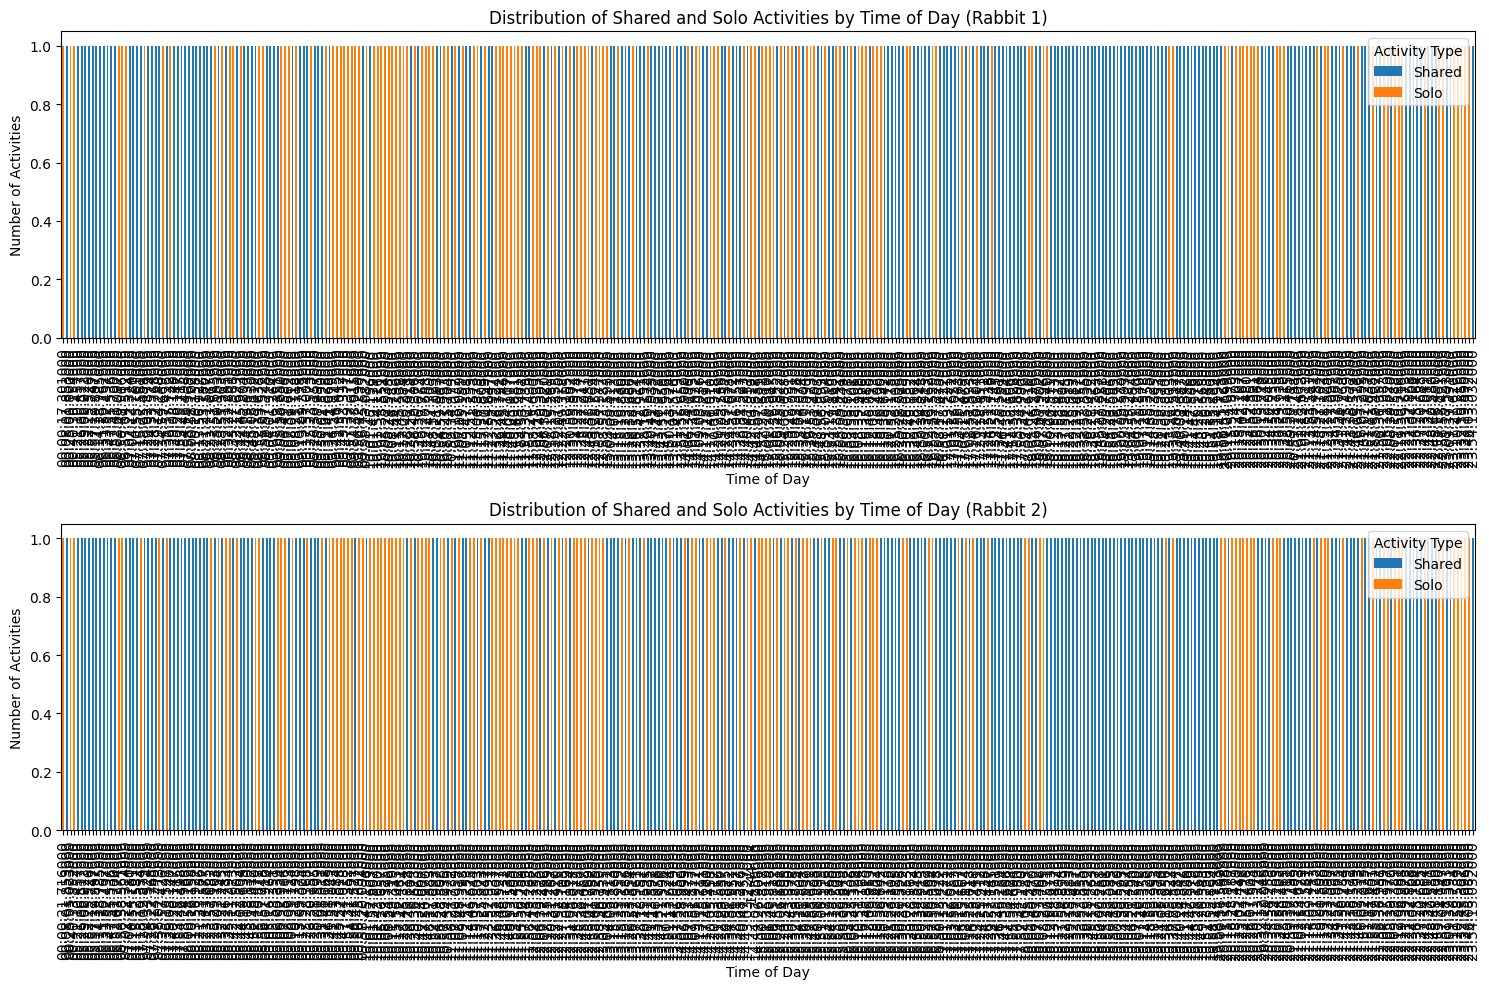

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot for Rabbit 1
df_rabbit1_time_distribution_pivot = df_rabbit1_time_distribution.pivot(index='Time', columns='Activity_Type', values='Activity_Count').fillna(0)
df_rabbit1_time_distribution_pivot[['Shared', 'Solo']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of Shared and Solo Activities by Time of Day (Rabbit 1)')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Number of Activities')
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(title='Activity Type')

# Plot for Rabbit 2
df_rabbit2_time_distribution_pivot = df_rabbit2_time_distribution.pivot(index='Time', columns='Activity_Type', values='Activity_Count').fillna(0)
df_rabbit2_time_distribution_pivot[['Shared', 'Solo']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Distribution of Shared and Solo Activities by Time of Day (Rabbit 2)')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Number of Activities')
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(title='Activity Type')

plt.tight_layout()
plt.show()

## Summary:

### Key Findings of the Data Analysis

*   Analysing specific dates revealed significant shifts in shared vs. solo activity distribution. For instance, 6 July 2025, and 14 July 2025, showed a higher prevalence of shared activities across various behaviours, including potential mating-related interactions on July 14, 2025. Future investigations could look at whether these shifts were due to external factors or issues affecting the rabbits and their relationship.
*   Comparing behavioural patterns between Rabbit 1 and Rabbit 2 showed distinct differences. Rabbit 2 engaged in 'Alert' behavior as 'Shared' significantly more often (60%) than Rabbit 1 (20%). Conversely, Rabbit 2's 'Exploring' was predominantly 'Solo' (85.18%), compared to Rabbit 1 (69.23%). 'Cuddling' was exclusively 'Shared' for both, while 'Resting' was predominantly 'Solo' for both.
*   The analysis of activity type by time of day indicated clear time-of-day preferences for both shared and solo activities, suggesting potential diurnal or crepuscular patterns.

### Insights or Next Steps

*   Investigate external factors or events that may have contributed to the significant shifts in shared vs. solo activity distribution on the identified dates.
*   Conduct statistical tests to determine the significance of the observed behavioral differences between Rabbit 1 and Rabbit 2.


### Statistical Testing

To determine the significance of the observed behavioral differences between Rabbit 1 and Rabbit 2, chi-squared tests were conducted on the cross-tabulations of 'Behavior' and 'Activity_Type' for each rabbit.

In [24]:
from scipy.stats import chi2_contingency

# Chi-squared test for Rabbit 1
chi2_rabbit1, p_rabbit1, dof_rabbit1, expected_rabbit1 = chi2_contingency(cross_tab_rabbit1)
print(f"--- Chi-squared test results for Rabbit 1 ---")
print(f"Chi-squared statistic: {chi2_rabbit1}")
print(f"P-value: {p_rabbit1}")
print(f"Degrees of freedom: {dof_rabbit1}")

# Chi-squared test for Rabbit 2
chi2_rabbit2, p_rabbit2, dof_rabbit2, expected_rabbit2 = chi2_contingency(cross_tab_rabbit2)
print(f"\n--- Chi-squared test results for Rabbit 2 ---")
print(f"Chi-squared statistic: {chi2_rabbit2}")
print(f"P-value: {p_rabbit2}")
print(f"Degrees of freedom: {dof_rabbit2}")

# Interpretation
alpha = 0.05
print("\n--- Interpretation ---")
if p_rabbit1 < alpha:
    print("For Rabbit 1, there is a statistically significant relationship between Behavior and Activity Type (p < 0.05).")
else:
    print("For Rabbit 1, there is no statistically significant relationship between Behavior and Activity Type (p >= 0.05).")

if p_rabbit2 < alpha:
    print("For Rabbit 2, there is a statistically significant relationship between Behavior and Activity Type (p < 0.05).")
else:
    print("For Rabbit 2, there is no statistically significant relationship between Behavior and Activity Type (p >= 0.05).")

--- Chi-squared test results for Rabbit 1 ---
Chi-squared statistic: 148.22464993474625
P-value: 4.6946216761785715e-25
Degrees of freedom: 13

--- Chi-squared test results for Rabbit 2 ---
Chi-squared statistic: 130.4651353073601
P-value: 3.754366790267662e-23
Degrees of freedom: 10

--- Interpretation ---
For Rabbit 1, there is a statistically significant relationship between Behavior and Activity Type (p < 0.05).
For Rabbit 2, there is a statistically significant relationship between Behavior and Activity Type (p < 0.05).
